# **📊 Two-Sample T-Test Project: Is There a Difference in Average Revenue Between North and South Regions?**

**Description:**

This project conducts a comprehensive Two-Sample Independent t-test using a synthetic dataset simulating revenue data from two regions — North and South. The goal is to determine whether there is a statistically significant difference in average revenue between the two regions. We generate normally distributed revenue data for both groups and visualize the distribution through histograms and Q-Q plots. Before applying the t-test, we perform essential assumption checks, including the Shapiro-Wilk test for normality and Levene’s test for equality of variances. Based on these checks, we proceed with the appropriate version of the t-test. The results are interpreted using a 5% significance level, and conclusions are drawn based on the p-value. This project not only demonstrates the application of the Two-Sample T-Test but also emphasizes the importance of verifying assumptions and interpreting real-world business scenarios statistically.

## **1. Importing the Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, probplot


## **2. Business Scenario & Goal**

**Scenario**: A retail company operates in two regions: North and South. The business team suspects that average revenue may differ between these two regions.

**Goal:** To test whether the average revenue from the North region is significantly different from the South region using a Two-Sample T-Test.



## **3. Hypothesis Definition**

*  **Null Hypothesis (H₀)**: There is no difference in the average revenue between the North and South regions (μ₁ = μ₂).

*  **Alternative Hypothesis (H₁)**: There is a significant difference in the average revenue between the North and South regions (μ₁ ≠ μ₂).

## **4. Synthetic Data Generation**

* North region: Mean = 50,000, SD = 8,000

* South region: Mean = 51,000, SD = 8,500

* Total Records = 500

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Simulate revenue: Normal distribution with different means
north_revenue = np.random.normal(loc=50000, scale=8000, size=250)
south_revenue = np.random.normal(loc=51000, scale=8500, size=250)

# Create DataFrame
sales_data = pd.DataFrame({
    'region': ['North'] * 250 + ['South'] * 250,
    'revenue': np.concatenate([north_revenue, south_revenue])
})

sales_data.head()


,region,revenue
0,North,53973.713224
1,North,48893.885591
2,North,55181.508305
3,North,62184.238851
4,North,48126.773002


## **5. Visualizing the Data**


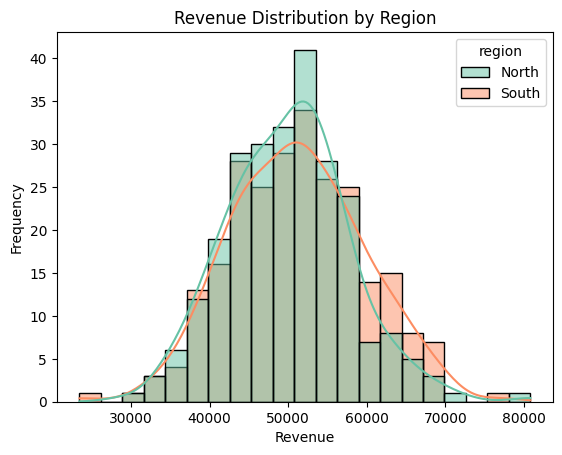

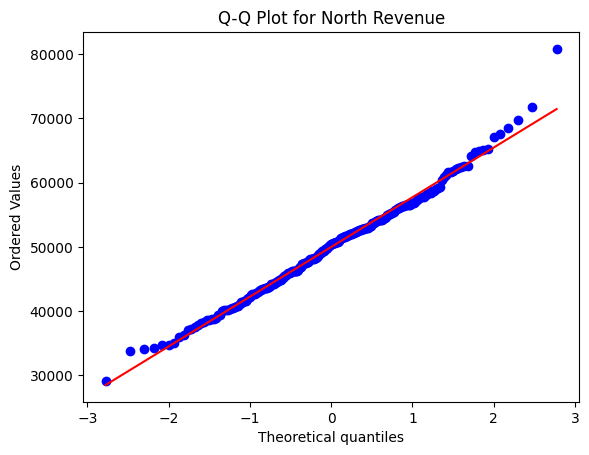

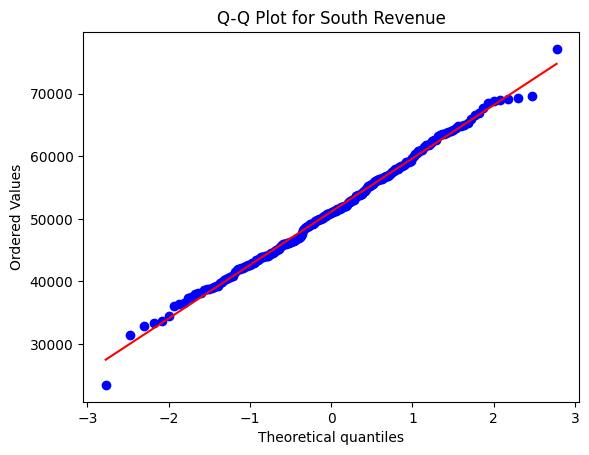

In [3]:
sns.histplot(data=sales_data, x='revenue', hue='region', kde=True, palette='Set2')
plt.title("Revenue Distribution by Region")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
for region in ['North', 'South']:
    probplot(sales_data[sales_data['region'] == region]['revenue'], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot for {region} Revenue')
    plt.show()


## **6. Assumption Checks**

**a) Normality (Shapiro-Wilk Test)**

In [4]:
for region in ['North', 'South']:
    stat, p = shapiro(sales_data[sales_data['region'] == region]['revenue'])
    print(f"{region} Shapiro-Wilk p = {p:.4f}")


North Shapiro-Wilk p = 0.1258
South Shapiro-Wilk p = 0.8835


**b) Equal Variance (Levene’s Test)**

In [5]:
north = sales_data[sales_data['region'] == 'North']['revenue']
south = sales_data[sales_data['region'] == 'South']['revenue']
stat, p_levene = levene(north, south)
print(f"Levene’s p = {p_levene:.4f}")


Levene’s p = 0.1221


## **7. Two-Sample Independent t-test**

In [6]:
equal_var = p_levene > 0.05
stat, p = ttest_ind(north, south, equal_var=equal_var)
print(f"t-test: Statistic = {stat:.4f}, p-value = {p:.4f}")


t-test: Statistic = -1.5930, p-value = 0.1118


## **8. Interpretation of Results**

In [7]:
alpha = 0.05
if p < alpha:
    print(f"✅ Very Low p-value (p = {p:.4f}); Reject the null hypothesis at 5% level of significance.")
    print("Conclusion: Average revenue is significantly different between North and South regions.")
else:
    print(f"❌ High p-value (p = {p:.4f}); Fail to reject the null hypothesis at 5% level of significance.")
    print("Conclusion: No significant difference in average revenue between North and South regions.")


❌ High p-value (p = 0.1118); Fail to reject the null hypothesis at 5% level of significance.
Conclusion: No significant difference in average revenue between North and South regions.
